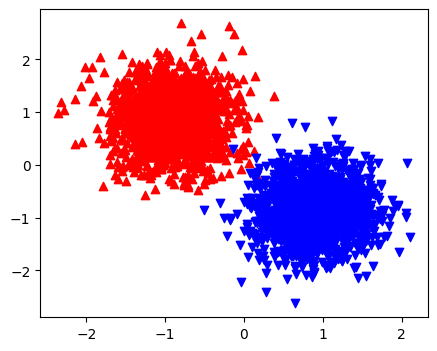

In [8]:
import matplotlib.pyplot as plt
import numpy as np

N = 1500
from sklearn.datasets import make_blobs
# Создаем 2 гауссовских кластера
x_data, y_data = make_blobs(n_samples = 2 * N, centers = 2,
                            n_features = 2, center_box = (-7.0, 7.0))




std = True
if std:
    from sklearn.preprocessing import StandardScaler
    scaler = StandardScaler(copy = False).fit(x_data)
    x_data = scaler.transform(x_data)

    
def plt_sets(a, b):
    lst_x = [p[0] for p, y in zip(a, b) if y == 0]
    lst_y = [p[1] for p, y in zip(a, b) if y == 0]
    lst_x2 = [p[0] for p, y in zip(a, b) if y == 1]
    lst_y2 = [p[1] for p, y in zip(a, b) if y == 1]
    plt.figure(figsize = (5, 4))
    plt.scatter(lst_x, lst_y, color = 'red', marker = '^')
    plt.scatter(lst_x2, lst_y2, color = 'blue', marker = 'v')
plt_sets(x_data, y_data)
from sklearn.model_selection import train_test_split
x_trn, x_vl, y_trn, y_vl = train_test_split(x_data, y_data, test_size = 0.2, shuffle = True)



In [9]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, InputLayer,Activation

act = "linear"
bias = False
# Построение модели
model = Sequential([
    InputLayer(input_shape=(2,)),
    Dense(1, activation=act, use_bias= bias),
    Activation(act)
])
num_ep = 60

# Компиляция модели
model.compile(loss='mse', optimizer= tf.keras.optimizers.Adam(learning_rate= 0.001), metrics=['accuracy'])

# Обучение модели
history = model.fit(x_trn, y_trn, epochs=num_ep, validation_data=(x_vl, y_vl), verbose= 1 )
print(model.summary())


Epoch 1/60
75/75 [==============================] - 0s 2ms/step - loss: 1.4059 - accuracy: 0.9867 - val_loss: 1.3546 - val_accuracy: 0.9900
Epoch 2/60
75/75 [==============================] - 0s 740us/step - loss: 1.1422 - accuracy: 0.9833 - val_loss: 1.0984 - val_accuracy: 0.9867
Epoch 3/60
75/75 [==============================] - 0s 732us/step - loss: 0.9292 - accuracy: 0.9779 - val_loss: 0.8912 - val_accuracy: 0.9850
Epoch 4/60
75/75 [==============================] - 0s 689us/step - loss: 0.7593 - accuracy: 0.9750 - val_loss: 0.7296 - val_accuracy: 0.9783
Epoch 5/60
75/75 [==============================] - 0s 740us/step - loss: 0.6269 - accuracy: 0.9654 - val_loss: 0.6022 - val_accuracy: 0.9683
Epoch 6/60
75/75 [==============================] - 0s 713us/step - loss: 0.5258 - accuracy: 0.9546 - val_loss: 0.5059 - val_accuracy: 0.9567
Epoch 7/60
75/75 [==============================] - 0s 833us/step - loss: 0.4504 - accuracy: 0.9404 - val_loss: 0.4352 - val_accuracy: 0.9467
Epoch 8/

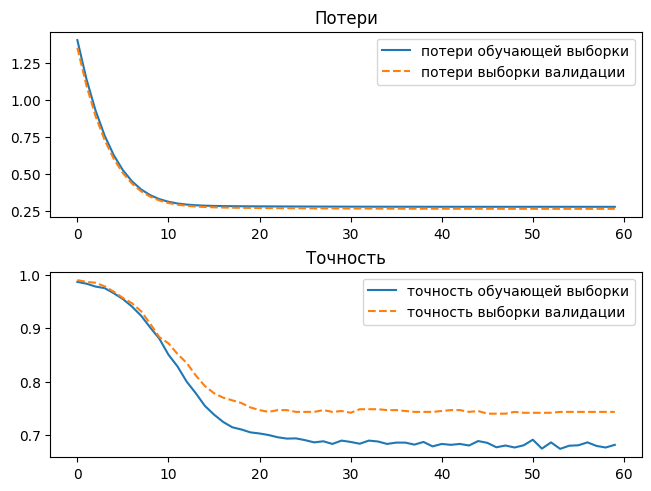

In [10]:

x = range(0,num_ep)
fig, axs = plt.subplots(2, 1, constrained_layout = True)

axs[0].plot(x, history.history['loss'], label = "потери обучающей выборки")

axs[0].plot(x, history.history['val_loss'],label = "потери выборки валидации", linestyle= "--")
axs[0].set_title("Потери")
axs[0].legend()
axs[1].plot(x, history.history['accuracy'], label = "точность обучающей выборки")
axs[1].plot(x, history.history['val_accuracy'],label = "точность выборки валидации",linestyle = "--")
axs[1].set_title("Точность")
axs[1].legend()
plt.show()

In [11]:
model.evaluate(x_vl,y_vl)
y_pred = [0 if i<0 else 1 for i in model.predict(x_vl)]


19/19 [==============================] - 0s 421us/step
[-0.9702276]
19/19 [==============================] - 0s 471us/step


[array([[ 0.3276409 ],
       [-0.17502241]], dtype=float32)]


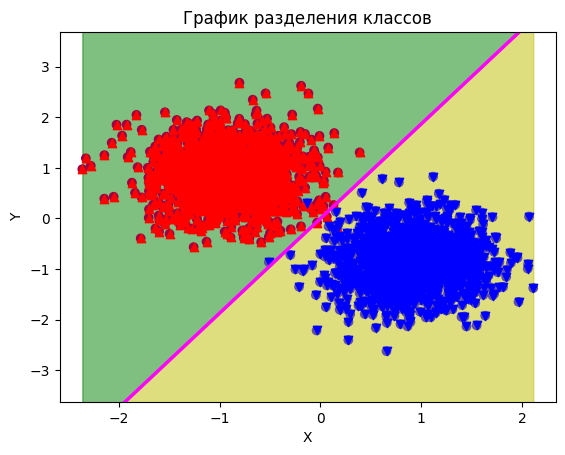

<Figure size 500x400 with 0 Axes>

In [12]:


weights = model.get_weights()
print(weights)
x_values = np.linspace(min(x_data[:, 0]), max(x_data[:, 0]), 100)
if act == "linear":
    if bias:
        y_values = -(weights[0][0] / weights[0][1]) * x_values +(0.5-weights[1])/ weights[0][1]
    else:
        y_values = (-weights[0][0] / weights[0][1]) * x_values
if act == "sigmoid":
    if bias:
        y_values = -(weights[0][0] / weights[0][1]) * x_values +(-weights[1])/ weights[0][1]
    else:
        y_values = (-weights[0][0] / weights[0][1]) * x_values
if act == 'tanh':
    if bias:
        y_values = -(weights[0][0] / weights[0][1]) * x_values +(0.5493-weights[1])/ weights[0][1]
    else:
        y_values = (-weights[0][0] / weights[0][1]) * x_values
    

fig, ax = plt.subplots()
ax.plot(x_values, y_values, color='magenta',linewidth=2.5)
ax.set_title('График разделения классов')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_ylim([min(x_data[:,1])-1, max(x_data[:,1])+1])
ax.fill_between(x_values, max(x_data[:, 0]) +2, y_values, interpolate=True, color="g", alpha=0.5)
ax.fill_between(x_values,min(x_data[:, 0])-2 , y_values , interpolate=True, color="y", alpha=0.5)
ax.scatter(x_data[:, 0], x_data[:, 1], c=y_data, cmap=plt.cm.Spectral)
lst_x = [p[0] for p, y in zip(x_data, y_data) if y == 0]
lst_y = [p[1] for p, y in zip(x_data, y_data) if y == 0]
lst_x2 = [p[0] for p, y in zip(x_data, y_data) if y == 1]
lst_y2 = [p[1] for p, y in zip(x_data, y_data) if y == 1]
plt.figure(figsize = (5, 4))
ax.scatter(lst_x, lst_y, color = 'red', marker = '^')
ax.scatter(lst_x2, lst_y2, color = 'blue', marker = 'v')
plt.show()

